# WeatherPy
----

### Analysis
1. The temperature rises as it approaches 0 degrees latitude, whether from the northern or southern hemisphere. It is interesting to note that the northern hemisphere seems to gets colder at a faster rate than the southern hemisphere.
2. There doesn't seem to be any correlation between latitude and humidity, however, a majority of the cities have a humidity of 60% or greater.
3. There does not seem to a strong correlation between latitude and wind speed, but it is interesting to note that the highest wind speeds are associated at the top of the northern hemisphere (approx 70-80 degrees).
---


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# # Build query URL
city_data=[]

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    # Log the url, record, and set numbers
    print((record_count, set_count, city))
    record_count += 1
    try:
        #Api call
        city_weather = requests.get(city_url).json()
        #Parsing API
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        #Append city info
        city_data.append({"City": city, 
                        "Country":city_country,
                        "Lat": city_lat,
                        "Lng": city_lng, 
                        "Max Temp":city_max_temp,
                        "Cloudiness":city_clouds,
                        "Wind Speed":city_wind,
                        "Humidity":city_humidity,
                        "Date":city_date
                         })
    except:
        print("city not found")
        pass
print("-----------------------------")
print("Data retrieval complete")
print("------------------------------")

Beginning Data Retrieval     
-----------------------------
(1, 1, 'vestmannaeyjar')
(2, 1, 'vaini')
(3, 1, 'pali')
(4, 1, 'keta')
(5, 1, 'punta arenas')
(6, 1, 'tabiauea')
city not found
(7, 1, 'butaritari')
(8, 1, 'caravelas')
(9, 1, 'lompoc')
(10, 1, 'paamiut')
(11, 1, 'upernavik')
(12, 1, 'rikitea')
(13, 1, 'ushuaia')
(14, 1, 'avarua')
(15, 1, 'albany')
(16, 1, 'kaitangata')
(17, 1, 'barentsburg')
city not found
(18, 1, 'bandarbeyla')
(19, 1, 'martinsicuro')
(20, 1, 'kapaa')
(21, 1, 'lata')
(22, 1, 'yellowknife')
(23, 1, 'lagdo')
(24, 1, 'jamestown')
(25, 1, 'upington')
(26, 1, 'quatre cocos')
(27, 1, 'doka')
(28, 1, 'arlit')
(29, 1, 'bethel')
(30, 1, 'san patricio')
(31, 1, 'utete')
(32, 1, 'newport')
(33, 1, 'bluff')
(34, 1, 'airai')
(35, 1, 'cape town')
(36, 1, 'constitucion')
(37, 1, 'hunza')
city not found
(38, 1, 'margate')
(39, 1, 'novaya mayna')
(40, 1, 'new norfolk')
(41, 1, 'narsaq')
(42, 1, 'codrington')
(43, 1, 'rawson')
(44, 1, 'salalah')
(45, 1, 'busselton')
(46, 1, '

(24, 8, 'botwood')
(25, 8, 'nampula')
(26, 8, 'kyzyl-suu')
(27, 8, 'dianopolis')
city not found
(28, 8, 'vilhena')
(29, 8, 'chegdomyn')
(30, 8, 'san quintin')
(31, 8, 'mount isa')
(32, 8, 'baoqing')
(33, 8, 'fortuna')
(34, 8, 'buraydah')
(35, 8, 'puerto baquerizo moreno')
(36, 8, 'suez')
(37, 8, 'flinders')
(38, 8, 'buston')
(39, 8, 'wanning')
(40, 8, 'kazalinsk')
city not found
(41, 8, 'mareeba')
(42, 8, 'alice springs')
(43, 8, 'srandakan')
(44, 8, 'panama city')
(45, 8, 'kirakira')
(46, 8, 'manbij')
(47, 8, 'tabou')
(48, 8, 'bull savanna')
(49, 8, 'lamu')
(0, 9, 'ixtapa')
(1, 9, 'mirina')
city not found
(2, 9, 'novoleushkovskaya')
(3, 9, 'bowen')
(4, 9, 'natal')
(5, 9, 'taoudenni')
(6, 9, 'yirol')
city not found
(7, 9, 'garowe')
(8, 9, 'nizhneyansk')
city not found
(9, 9, 'vanimo')
(10, 9, 'mackay')
(11, 9, 'san luis')
(12, 9, 'yenagoa')
(13, 9, 'fairbanks')
(14, 9, 'ulladulla')
(15, 9, 'kununurra')
(16, 9, 'lengshuitan')
(17, 9, 'niort')
(18, 9, 'nioro')
(19, 9, 'wa')
city not foun

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_df=pd.DataFrame(city_data)
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,vestmannaeyjar,100,IS,1556679283,95,63.44,-20.27,46.54,4.18
1,vaini,20,IN,1556676000,94,15.34,74.49,71.60,5.82
2,pali,0,IN,1556679284,28,25.77,73.33,89.07,14.29
3,keta,20,GH,1556676000,88,5.92,0.99,82.40,10.29
4,punta arenas,75,CL,1556679188,80,-53.16,-70.91,35.60,4.70
5,butaritari,83,KI,1556679284,81,3.07,172.79,83.78,14.63
6,caravelas,23,BR,1556679284,86,-17.73,-39.27,77.26,4.72
7,lompoc,90,US,1556679185,67,34.64,-120.46,60.80,9.17
8,paamiut,100,GL,1556679285,58,61.99,-49.67,40.08,8.10
9,upernavik,0,GL,1556679285,78,72.79,-56.15,33.81,2.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

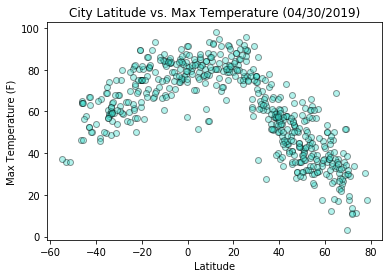

In [17]:
latitude=city_data_df["Lat"]
temp=city_data_df["Max Temp"]
lat_vs_temp=plt.scatter(latitude, 
            temp, c="turquoise", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.4, label="Max Temp")
plt.title("City Latitude vs. Max Temperature (04/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../Images/LatvsTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

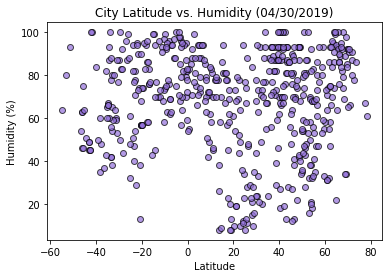

In [43]:
humidity=city_data_df["Humidity"]
lat_vs_humidity=plt.scatter(latitude, 
            humidity, c="mediumpurple", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.7, label="Humidity")
plt.title("City Latitude vs. Humidity (04/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/LatvsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

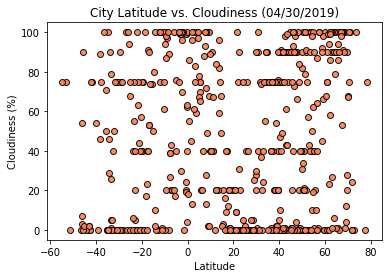

In [42]:
cloudiness=city_data_df["Cloudiness"]
lat_vs_humidity=plt.scatter(latitude, 
            cloudiness, c="coral", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.9, label="Cloudiness")
plt.title("City Latitude vs. Cloudiness (04/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/LatvsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

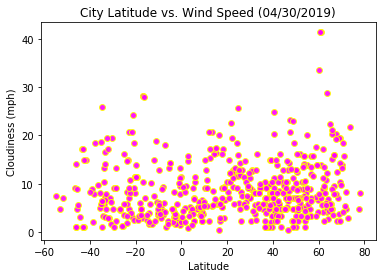

In [37]:
wind=city_data_df["Wind Speed"]
lat_vs_humidity=plt.scatter(latitude, 
            wind, c="magenta", 
            edgecolor="yellow", linewidths=1, marker="o", 
            alpha=0.9, label="Wind Speed")
plt.title("City Latitude vs. Wind Speed (04/30/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (mph)")
plt.savefig("../Images/LatvsCloudiness.png")
plt.show()